<a href="https://colab.research.google.com/github/DivyaSadhana/Prediction-of-Hospitalization-rate-based-on-Age-Vaccine-Manufacturer-Number-of-days-for-event-Onse/blob/main/Prediction_of_Hospitalization_rate_based_on_Age%2C_Vaccine_Manufacturer%2C_Number_of_days_for_event_Onset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Establish connection between My Drive and Google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import File

import pandas as pd
df = pd.read_excel(r'/content/gdrive/My Drive/2023_Master_Tracker.xlsx')
df

VAERS_ID   RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
0        2547730 2023-01-01    DE    53.00      NaN      NaN   F      NaN   
1        2547730 2023-01-01    DE    53.00      NaN      NaN   F      NaN   
2        2547730 2023-01-01    DE    53.00      NaN      NaN   F      NaN   
3        2547731 2023-01-01    MA     6.00      6.0      NaN   M      NaN   
4        2547732 2023-01-01    MA    38.00     38.0      NaN   F      NaN   
...          ...        ...   ...      ...      ...      ...  ..      ...   
155172   2717538 2023-11-24    CO      NaN      NaN      NaN   U      NaN   
155173   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155174   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155175   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   
155176   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   

                                             SYMPTOM_TEXT DIED  ...  \
0       The adverse event is that the patient went int...  NaN  ...   
1       The adverse event is that the patient went int...  NaN  ...   
2       The adverse event is that the patient went int...  NaN  ...   
3                        Error: Incorrect Reconstitution-  NaN  ...   
4            Error: Patient Accidentally Stuck by Needle-  NaN  ...   
...                                                   ...  ...  ...   
155172  breast cancer; This spontaneous case was repor...  NaN  ...   
155173  I could barely lift my arm/ could barely move;...  NaN  ...   
155174  I could barely lift my arm/ could barely move;...  NaN  ...   
155175  Patient received monovalent vaccine on Friday,...  NaN  ...   
155176  Patient received monovalent vaccine on Friday,...  NaN  ...   

                 SYMPTOM3                    SYMPTOM4  \
0                    Coma       Computerised tomogram   
1         Laboratory test  Magnetic resonance imaging   
2                   X-ray                         NaN   
3                     NaN                         NaN   
4                     NaN                         NaN   
...                   ...                         ...   
155172                NaN                         NaN   
155173            Fatigue              Gait inability   
155174  Pain in extremity                         NaN   
155175                NaN                         NaN   
155176                NaN                         NaN   

                                 SYMPTOM5   VAX_TYPE         VAX_MANU  \
0                  Exposure to SARS-CoV-2    COVID19          JANSSEN   
1       SARS-CoV-2 antibody test negative    COVID19          JANSSEN   
2                                     NaN    COVID19          JANSSEN   
3                                     NaN    COVID19  PFIZER\BIONTECH   
4                                     NaN  COVID19-2          MODERNA   
...                                   ...        ...              ...   
155172                                NaN    COVID19          MODERNA   
155173                      Lymphadenitis    COVID19          MODERNA   
155174                                NaN    COVID19          MODERNA   
155175                                NaN    COVID19          MODERNA   
155176                                NaN       FLU4   SANOFI PASTEUR   

         VAX_LOT VAX_DOSE_SERIES VAX_ROUTE VAX_SITE  \
0        1808982             UNK       SYR       AR   
1        1808982             UNK       SYR       AR   
2        1808982             UNK       SYR       AR   
3         GK1657               3        IM       LA   
4        141H22A               4        IM       LA   
...          ...             ...       ...      ...   
155172       NaN             UNK       NaN      NaN   
155173       NaN               6       NaN      NaN   
155174       NaN               6       NaN      NaN   
155175   AS1417B               1        IM       LL   
155176  UT7723NA               2        IM       RL   

       

In [ ]:
# Remove rows of the patients whose side effect onset data (NUMDAYS) is not available or null
df = df.dropna(subset=['NUMDAYS'])
df

VAERS_ID   RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
3        2547731 2023-01-01    MA     6.00      6.0      NaN   M      NaN   
4        2547732 2023-01-01    MA    38.00     38.0      NaN   F      NaN   
5        2547733 2023-01-01    CA    63.00     63.0      NaN   M      NaN   
6        2547734 2023-01-01    IL    30.00     30.0      NaN   F      NaN   
7        2547735 2023-01-01    LA    38.00     38.0      NaN   F      NaN   
...          ...        ...   ...      ...      ...      ...  ..      ...   
155169   2717532 2023-11-24    AL    30.00     30.0      NaN   F      NaN   
155173   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155174   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155175   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   
155176   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   

                                             SYMPTOM_TEXT DIED  ...  \
3                        Error: Incorrect Reconstitution-  NaN  ...   
4            Error: Patient Accidentally Stuck by Needle-  NaN  ...   
5                  Error: Dose in Series Given Too Early-  NaN  ...   
6                          Systemic: EYE TWITCHING-Medium  NaN  ...   
7       Systemic: Confusion-Mild, Systemic: Fainting /...  NaN  ...   
...                                                   ...  ...  ...   
155169  she received Fluzone Quadrivalent and is curre...  NaN  ...   
155173  I could barely lift my arm/ could barely move;...  NaN  ...   
155174  I could barely lift my arm/ could barely move;...  NaN  ...   
155175  Patient received monovalent vaccine on Friday,...  NaN  ...   
155176  Patient received monovalent vaccine on Friday,...  NaN  ...   

                 SYMPTOM3        SYMPTOM4                 SYMPTOM5   VAX_TYPE  \
3                     NaN             NaN                      NaN    COVID19   
4                     NaN             NaN                      NaN  COVID19-2   
5                     NaN             NaN                      NaN    COVID19   
6                     NaN             NaN                      NaN       TDAP   
7              Dysarthria         Syncope  Unresponsive to stimuli  COVID19-2   
...                   ...             ...                      ...        ...   
155169                NaN             NaN                      NaN       FLU4   
155173            Fatigue  Gait inability            Lymphadenitis    COVID19   
155174  Pain in extremity             NaN                      NaN    COVID19   
155175                NaN             NaN                      NaN    COVID19   
155176                NaN             NaN                      NaN       FLU4   

                           VAX_MANU   VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
3                   PFIZER\BIONTECH    GK1657               3        IM   
4                           MODERNA   141H22A               4        IM   
5                           MODERNA   042h22a               1        IM   
6       GLAXOSMITHKLINE BIOLOGICALS     KP547               1        IM   
7                   PFIZER\BIONTECH    GJ3274             NaN        IM   
...                             ...       ...             ...       ...   
155169               SANOFI PASTEUR  UT8144NA             UNK        OT   
155173                      MODERNA       NaN               6       NaN   
155174                      MODERNA       NaN               6       NaN   
155175                      MODERNA   AS1417B               1        IM   
155176               SANOFI PASTEUR  UT7723NA               2        IM   

       VAX_SITE                                      VAX_NAME  
3            LA           COVID19 (COVID19 (PFIZER-BIONTECH))  
4            LA          COVID19 (COVID19 (MODERNA BIVALENT))  
5            LA                   COVID19 (COVID19 (MODERNA))  
6            LA                               TDAP (BOOSTRIX)  
7            LA  COVID19 (COVID19 (P

In [ ]:
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                   float64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                       object
DATEDIED                   object
L_THREAT                   object
ER_VISIT                   object
HOSPITAL                   object
HOSPDAYS                  float64
X_STAY                     object
DISABLE                    object
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                   float64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

In [ ]:
# Convert data type of NUMDAYS to Integer from Float
df = df.astype({"NUMDAYS": 'int'})


In [ ]:
# Calculate Mean for NUMDAYS
mean_value = df['NUMDAYS'].mean()


# Calculate Median for NUMDAYS
median_value = df['NUMDAYS'].median()


# Calculate Mode for NUMDAYS
mode_value = df['NUMDAYS'].mode()

# Calculate Maximum Value
Maximum_Value = df['NUMDAYS'].max()

#Calculate Minimum Value
Minimum_Value = df['NUMDAYS'].min()

# Generate the Results to compare Mean, Median, Mode values

print(f"The mean of the NUMDAYS column is {mean_value}.")
print(f"The median of the NUMDAYS column is {median_value}.")
print(f"The mode of the NUMDAYS column is {mode_value}.")
print(f"The Maximum value of the NUMDAYS column is {Maximum_Value}.")
print(f"The Minimum value of the NUMDAYS column is {Minimum_Value}.")


The mean of the NUMDAYS column is 124.1281209751253.
The median of the NUMDAYS column is 2.0.
The mode of the NUMDAYS column is 0    0
Name: NUMDAYS, dtype: int64.
The Maximum value of the NUMDAYS column is 66108.
The Minimum value of the NUMDAYS column is 0.


In [ ]:
Removal = df[ (df['NUMDAYS'] >= 31)].index
df.drop(Removal , inplace=True)
df

VAERS_ID   RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
3        2547731 2023-01-01    MA     6.00      6.0      NaN   M      NaN   
4        2547732 2023-01-01    MA    38.00     38.0      NaN   F      NaN   
5        2547733 2023-01-01    CA    63.00     63.0      NaN   M      NaN   
6        2547734 2023-01-01    IL    30.00     30.0      NaN   F      NaN   
7        2547735 2023-01-01    LA    38.00     38.0      NaN   F      NaN   
...          ...        ...   ...      ...      ...      ...  ..      ...   
155169   2717532 2023-11-24    AL    30.00     30.0      NaN   F      NaN   
155173   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155174   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155175   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   
155176   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   

                                             SYMPTOM_TEXT DIED  ...  \
3                        Error: Incorrect Reconstitution-  NaN  ...   
4            Error: Patient Accidentally Stuck by Needle-  NaN  ...   
5                  Error: Dose in Series Given Too Early-  NaN  ...   
6                          Systemic: EYE TWITCHING-Medium  NaN  ...   
7       Systemic: Confusion-Mild, Systemic: Fainting /...  NaN  ...   
...                                                   ...  ...  ...   
155169  she received Fluzone Quadrivalent and is curre...  NaN  ...   
155173  I could barely lift my arm/ could barely move;...  NaN  ...   
155174  I could barely lift my arm/ could barely move;...  NaN  ...   
155175  Patient received monovalent vaccine on Friday,...  NaN  ...   
155176  Patient received monovalent vaccine on Friday,...  NaN  ...   

                 SYMPTOM3        SYMPTOM4                 SYMPTOM5   VAX_TYPE  \
3                     NaN             NaN                      NaN    COVID19   
4                     NaN             NaN                      NaN  COVID19-2   
5                     NaN             NaN                      NaN    COVID19   
6                     NaN             NaN                      NaN       TDAP   
7              Dysarthria         Syncope  Unresponsive to stimuli  COVID19-2   
...                   ...             ...                      ...        ...   
155169                NaN             NaN                      NaN       FLU4   
155173            Fatigue  Gait inability            Lymphadenitis    COVID19   
155174  Pain in extremity             NaN                      NaN    COVID19   
155175                NaN             NaN                      NaN    COVID19   
155176                NaN             NaN                      NaN       FLU4   

                           VAX_MANU   VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
3                   PFIZER\BIONTECH    GK1657               3        IM   
4                           MODERNA   141H22A               4        IM   
5                           MODERNA   042h22a               1        IM   
6       GLAXOSMITHKLINE BIOLOGICALS     KP547               1        IM   
7                   PFIZER\BIONTECH    GJ3274             NaN        IM   
...                             ...       ...             ...       ...   
155169               SANOFI PASTEUR  UT8144NA             UNK        OT   
155173                      MODERNA       NaN               6       NaN   
155174                      MODERNA       NaN               6       NaN   
155175                      MODERNA   AS1417B               1        IM   
155176               SANOFI PASTEUR  UT7723NA               2        IM   

       VAX_SITE                                      VAX_NAME  
3            LA           COVID19 (COVID19 (PFIZER-BIONTECH))  
4            LA          COVID19 (COVID19 (MODERNA BIVALENT))  
5            LA                   COVID19 (COVID19 (MODERNA))  
6            LA                               TDAP (BOOSTRIX)  
7            LA  COVID19 (COVID19 (P

In [ ]:
# Calculate Mean, Median, Mode, Minimum, Maximum values to check execution of above logic
# Calculate Mean for NUMDAYS
Mean = df['NUMDAYS'].mean()


# Calculate Median for NUMDAYS
Median = df['NUMDAYS'].median()


# Calculate Mode for NUMDAYS
Mode = df['NUMDAYS'].mode()

# Calculate Maximum Value
Maximum = df['NUMDAYS'].max()

#Calculate Minimum Value
Minimum = df['NUMDAYS'].min()

# Generate the Results to compare Mean, Median, Mode values

print(f"The mean of the NUMDAYS column is {Mean}.")
print(f"The median of the NUMDAYS column is {Median}.")
print(f"The mode of the NUMDAYS column is {Mode}.")
print(f"The Maximum value of the NUMDAYS column is {Maximum}.")
print(f"The Minimum value of the NUMDAYS column is {Minimum}.")

The mean of the NUMDAYS column is 2.289135008043559.
The median of the NUMDAYS column is 0.0.
The mode of the NUMDAYS column is 0    0
Name: NUMDAYS, dtype: int64.
The Maximum value of the NUMDAYS column is 30.
The Minimum value of the NUMDAYS column is 0.


In [ ]:
# Remove null values of 'Age' column as the number of rows are not larger .
# Mean should be used for normal distributed data if the missing values are higher than available data.
# Median should be used if data is skewed towards left or right and missing values are high
df = df.dropna(subset=['AGE_YRS'])
df

VAERS_ID   RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
3        2547731 2023-01-01    MA     6.00      6.0      NaN   M      NaN   
4        2547732 2023-01-01    MA    38.00     38.0      NaN   F      NaN   
5        2547733 2023-01-01    CA    63.00     63.0      NaN   M      NaN   
6        2547734 2023-01-01    IL    30.00     30.0      NaN   F      NaN   
7        2547735 2023-01-01    LA    38.00     38.0      NaN   F      NaN   
...          ...        ...   ...      ...      ...      ...  ..      ...   
155169   2717532 2023-11-24    AL    30.00     30.0      NaN   F      NaN   
155173   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155174   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155175   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   
155176   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   

                                             SYMPTOM_TEXT DIED  ...  \
3                        Error: Incorrect Reconstitution-  NaN  ...   
4            Error: Patient Accidentally Stuck by Needle-  NaN  ...   
5                  Error: Dose in Series Given Too Early-  NaN  ...   
6                          Systemic: EYE TWITCHING-Medium  NaN  ...   
7       Systemic: Confusion-Mild, Systemic: Fainting /...  NaN  ...   
...                                                   ...  ...  ...   
155169  she received Fluzone Quadrivalent and is curre...  NaN  ...   
155173  I could barely lift my arm/ could barely move;...  NaN  ...   
155174  I could barely lift my arm/ could barely move;...  NaN  ...   
155175  Patient received monovalent vaccine on Friday,...  NaN  ...   
155176  Patient received monovalent vaccine on Friday,...  NaN  ...   

                 SYMPTOM3        SYMPTOM4                 SYMPTOM5   VAX_TYPE  \
3                     NaN             NaN                      NaN    COVID19   
4                     NaN             NaN                      NaN  COVID19-2   
5                     NaN             NaN                      NaN    COVID19   
6                     NaN             NaN                      NaN       TDAP   
7              Dysarthria         Syncope  Unresponsive to stimuli  COVID19-2   
...                   ...             ...                      ...        ...   
155169                NaN             NaN                      NaN       FLU4   
155173            Fatigue  Gait inability            Lymphadenitis    COVID19   
155174  Pain in extremity             NaN                      NaN    COVID19   
155175                NaN             NaN                      NaN    COVID19   
155176                NaN             NaN                      NaN       FLU4   

                           VAX_MANU   VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
3                   PFIZER\BIONTECH    GK1657               3        IM   
4                           MODERNA   141H22A               4        IM   
5                           MODERNA   042h22a               1        IM   
6       GLAXOSMITHKLINE BIOLOGICALS     KP547               1        IM   
7                   PFIZER\BIONTECH    GJ3274             NaN        IM   
...                             ...       ...             ...       ...   
155169               SANOFI PASTEUR  UT8144NA             UNK        OT   
155173                      MODERNA       NaN               6       NaN   
155174                      MODERNA       NaN               6       NaN   
155175                      MODERNA   AS1417B               1        IM   
155176               SANOFI PASTEUR  UT7723NA               2        IM   

       VAX_SITE                                      VAX_NAME  
3            LA           COVID19 (COVID19 (PFIZER-BIONTECH))  
4            LA          COVID19 (COVID19 (MODERNA BIVALENT))  
5            LA                   COVID19 (COVID19 (MODERNA))  
6            LA                               TDAP (BOOSTRIX)  
7            LA  COVID19 (COVID19 (P

In [ ]:
# Convert Age Data Type from Float to Integer

In [ ]:
df = df.astype({"AGE_YRS": 'int'})


# Change data type for 'Died' column : Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [ ]:
DIED = df['DIED'].fillna(0)
print(DIED)

3         0
4         0
5         0
6         0
7         0
         ..
155169    0
155173    0
155174    0
155175    0
155176    0
Name: DIED, Length: 75781, dtype: object


In [ ]:
df['DIED']= DIED
df.head(2)

VAERS_ID   RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
3   2547731 2023-01-01    MA        6      6.0      NaN   M      NaN   
4   2547732 2023-01-01    MA       38     38.0      NaN   F      NaN   

                                   SYMPTOM_TEXT DIED  ... SYMPTOM3 SYMPTOM4  \
3              Error: Incorrect Reconstitution-    0  ...      NaN      NaN   
4  Error: Patient Accidentally Stuck by Needle-    0  ...      NaN      NaN   

  SYMPTOM5   VAX_TYPE         VAX_MANU  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
3      NaN    COVID19  PFIZER\BIONTECH   GK1657               3        IM   
4      NaN  COVID19-2          MODERNA  141H22A               4        IM   

  VAX_SITE                              VAX_NAME  
3       LA   COVID19 (COVID19 (PFIZER-BIONTECH))  
4       LA  COVID19 (COVID19 (MODERNA BIVALENT))  

[2 rows x 47 columns]

In [ ]:
df['DIED'] = df['DIED'].replace('Y', 1)
print(df['DIED'])

3         0
4         0
5         0
6         0
7         0
         ..
155169    0
155173    0
155174    0
155175    0
155176    0
Name: DIED, Length: 75781, dtype: int64


# Change data type for 'Life_Threat' Column : Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [ ]:
df['L_THREAT'] = df['L_THREAT'].replace('Y', 1)
print(df['L_THREAT'])

3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
          ..
155169   NaN
155173   NaN
155174   NaN
155175   NaN
155176   NaN
Name: L_THREAT, Length: 75781, dtype: float64


In [ ]:
df['L_THREAT'] = df['L_THREAT'].fillna(0)
print(df['L_THREAT'])

3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
         ... 
155169    0.0
155173    0.0
155174    0.0
155175    0.0
155176    0.0
Name: L_THREAT, Length: 75781, dtype: float64


In [ ]:
df = df.astype({"L_THREAT": 'int'})


# Change data type for 'Hospital' column : Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [ ]:
df['HOSPITAL'] = df['HOSPITAL'].replace('Y', 1)
print(df['HOSPITAL'])

3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
          ..
155169   NaN
155173   NaN
155174   NaN
155175   NaN
155176   NaN
Name: HOSPITAL, Length: 75781, dtype: float64


In [ ]:
df['HOSPITAL'] = df['HOSPITAL'].fillna(0)
print(df['HOSPITAL'])

3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
         ... 
155169    0.0
155173    0.0
155174    0.0
155175    0.0
155176    0.0
Name: HOSPITAL, Length: 75781, dtype: float64


In [ ]:
df = df.astype({"HOSPITAL": 'int'})


# Change data type for'Disability' Column: Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [ ]:
df['DISABLE'] = df['DISABLE'].replace('Y', 1)
print(df['DISABLE'])

3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
          ..
155169   NaN
155173   NaN
155174   NaN
155175   NaN
155176   NaN
Name: DISABLE, Length: 75781, dtype: float64


In [ ]:

df['DISABLE'] = df['DISABLE'].fillna(0)
print(df['DISABLE'])

3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
         ... 
155169    0.0
155173    0.0
155174    0.0
155175    0.0
155176    0.0
Name: DISABLE, Length: 75781, dtype: float64


In [ ]:
df = df.astype({"DISABLE": 'int'})
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                     int64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                        int64
DATEDIED                   object
L_THREAT                  float64
ER_VISIT                   object
HOSPITAL                    int64
HOSPDAYS                  float64
X_STAY                     object
DISABLE                     int64
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                     int64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

# Pick only required columns by excluding unwanted columns

In [ ]:
Required_Data = df[['AGE_YRS','SEX','DIED','HOSPITAL','L_THREAT','DISABLE','NUMDAYS','VAX_MANU','VAX_ROUTE','VAX_SITE']]
Required_Data.head()

AGE_YRS SEX  DIED  HOSPITAL  L_THREAT  DISABLE  NUMDAYS  \
3        6   M     0         0       0.0        0        0   
4       38   F     0         0       0.0        0        0   
5       63   M     0         0       0.0        0        0   
6       30   F     0         0       0.0        0        0   
7       38   F     0         0       0.0        0        0   

                      VAX_MANU VAX_ROUTE VAX_SITE  
3              PFIZER\BIONTECH        IM       LA  
4                      MODERNA        IM       LA  
5                      MODERNA        IM       LA  
6  GLAXOSMITHKLINE BIOLOGICALS        IM       LA  
7              PFIZER\BIONTECH        IM       LA

#Perform Encoding, remove null values to execute correlation

df.corr() computes the pairwise correlation of columns, excluding NA/null values. The resulting correlation matrix is a DataFrame where each cell represents the correlation coefficient between two variables.

# Perform Correlation for Feature Selection

<ipython-input-95-f115fd784441>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Required_Data.corr()


           AGE_YRS      DIED  HOSPITAL  L_THREAT   DISABLE   NUMDAYS
AGE_YRS   1.000000  0.068411  0.133026  0.047200  0.067781  0.143557
DIED      0.068411  1.000000  0.112579  0.067423  0.006042  0.076783
HOSPITAL  0.133026  0.112579  1.000000  0.402984  0.212870  0.320035
L_THREAT  0.047200  0.067423  0.402984  1.000000  0.246601  0.123703
DISABLE   0.067781  0.006042  0.212870  0.246601  1.000000  0.175020
NUMDAYS   0.143557  0.076783  0.320035  0.123703  0.175020  1.000000


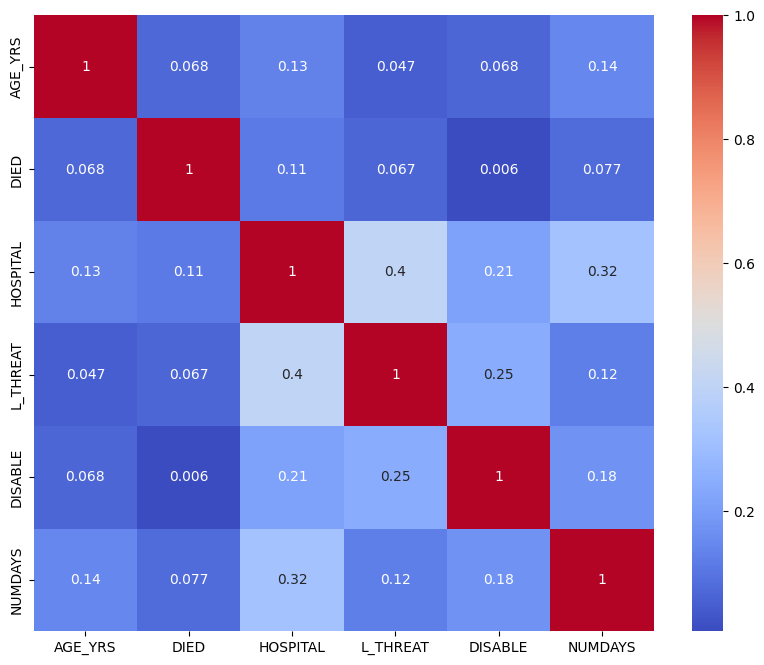

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Required_Data is your DataFrame
correlation_matrix = Required_Data.corr()

# Display the correlation matrix
print(correlation_matrix)

# If you want to visualize this correlation matrix, you can use seaborn's heatmap function:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Implement One hot encoding for Vaccine Manufacturer to establish correlation betwen features

In [ ]:
Modified_Data = df[['AGE_YRS','DIED','L_THREAT','DISABLE','NUMDAYS','VAX_MANU','HOSPITAL']]
Modified_Data.head()

AGE_YRS  DIED  L_THREAT  DISABLE  NUMDAYS                     VAX_MANU  \
3        6     0       0.0        0        0              PFIZER\BIONTECH   
4       38     0       0.0        0        0                      MODERNA   
5       63     0       0.0        0        0                      MODERNA   
6       30     0       0.0        0        0  GLAXOSMITHKLINE BIOLOGICALS   
7       38     0       0.0        0        0              PFIZER\BIONTECH   

   HOSPITAL  
3         0  
4         0  
5         0  
6         0  
7         0

In [ ]:
counts = Modified_Data.HOSPITAL.value_counts()
print(counts)

0    69397
1     6384
Name: HOSPITAL, dtype: int64


In [ ]:
count_zero = (Modified_Data.DIED == 0).sum()
count_one = (Modified_Data.DIED == 1).sum()

print(f"Count of 0: {count_zero}")
print(f"Count of 1: {count_one}")


Count of 0: 75144
Count of 1: 637


In [ ]:
count_zero = (Modified_Data.L_THREAT == 0).sum()
count_one = (Modified_Data.L_THREAT == 1).sum()

print(f"Count of 0: {count_zero}")
print(f"Count of 1: {count_one}")

Count of 0: 73803
Count of 1: 1978


In [ ]:
count_zero = (Modified_Data.DISABLE == 0).sum()
count_one = (Modified_Data.DISABLE == 1).sum()

print(f"Count of 0: {count_zero}")
print(f"Count of 1: {count_one}")

Count of 0: 72197
Count of 1: 3584


Apply One hot encoding

In [ ]:
# Import the necessary library
import pandas as pd

# Assuming Modified_Data is your DataFrame and 'Vaccine_Manufacturer' is the column to be encoded
Final_Data_encoded = pd.get_dummies(Modified_Data, columns=['VAX_MANU'])

# Now, Final_Data_encoded will have the one-hot encoded features of 'Vaccine_Manufacturer'
print(Final_Data_encoded.head())

   AGE_YRS  DIED  L_THREAT  DISABLE  NUMDAYS  HOSPITAL  \
3        6     0       0.0        0        0         0   
4       38     0       0.0        0        0         0   
5       63     0       0.0        0        0         0   
6       30     0       0.0        0        0         0   
7       38     0       0.0        0        0         0   

   VAX_MANU_BAVARIAN NORDIC  VAX_MANU_BERNA BIOTECH, LTD.  \
3                         0                             0   
4                         0                             0   
5                         0                             0   
6                         0                             0   
7                         0                             0   

   VAX_MANU_CSL LIMITED  VAX_MANU_DYNAVAX TECHNOLOGIES CORPORATION  ...  \
3                     0                                          0  ...   
4                     0                                          0  ...   
5                     0                                    

Establish Correlation with Vaccine Manufacturer

                                             AGE_YRS      DIED  L_THREAT  \
AGE_YRS                                     1.000000  0.068411  0.047200   
DIED                                        0.068411  1.000000  0.067423   
L_THREAT                                    0.047200  0.067423  1.000000   
DISABLE                                     0.067781  0.006042  0.246601   
NUMDAYS                                     0.143557  0.076783  0.123703   
HOSPITAL                                    0.133026  0.112579  0.402984   
VAX_MANU_BAVARIAN NORDIC                   -0.001115  0.001869 -0.005900   
VAX_MANU_BERNA BIOTECH, LTD.               -0.002663 -0.001673 -0.002974   
VAX_MANU_CSL LIMITED                        0.001766 -0.000334 -0.000595   
VAX_MANU_DYNAVAX TECHNOLOGIES CORPORATION  -0.011221 -0.004991 -0.008874   
VAX_MANU_EMERGENT BIOSOLUTIONS             -0.013820 -0.002917  0.002657   
VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS        0.005707 -0.021952 -0.034927   
VAX_MANU_INT

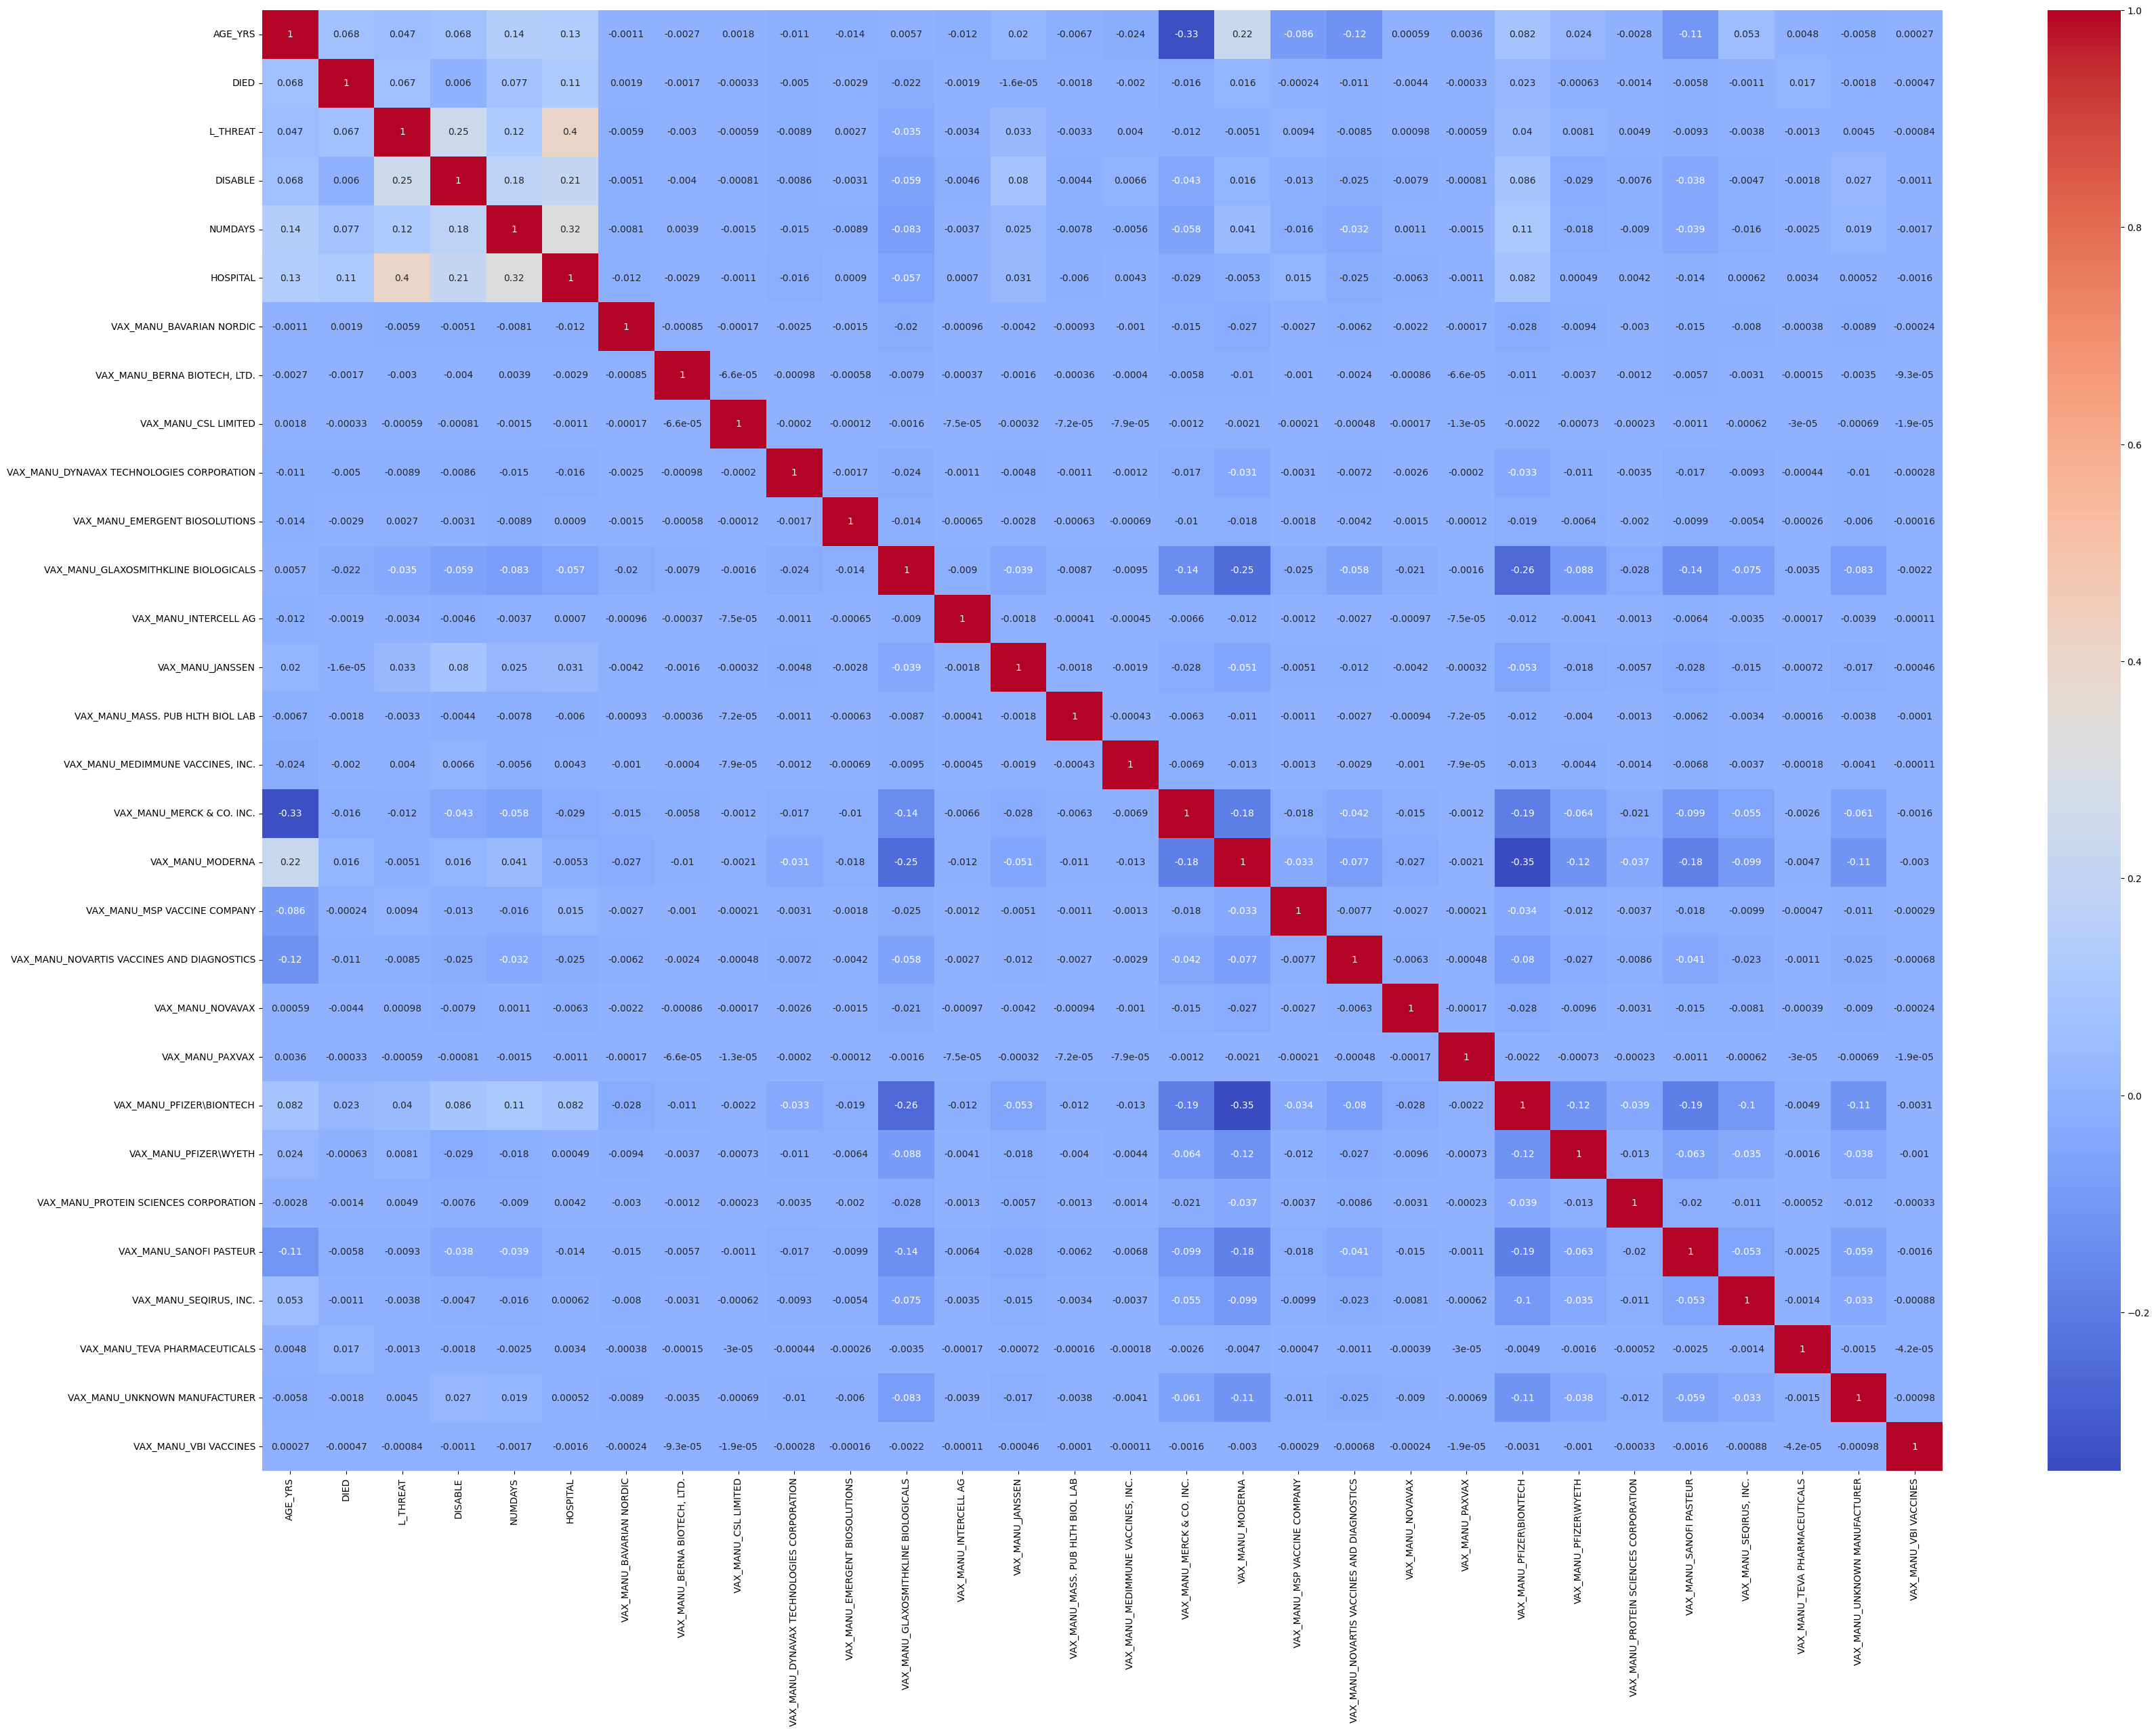

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Final_Data_encoded is your DataFrame
correlation_matrix = Final_Data_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# If you want to visualize this correlation matrix, you can use seaborn's heatmap function:
plt.figure(figsize=(40,28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
Final_Data = Final_Data_encoded.drop(['DIED','L_THREAT','DISABLE'], axis=1)
Final_Data.head()

AGE_YRS  NUMDAYS  HOSPITAL  VAX_MANU_BAVARIAN NORDIC  \
3        6        0         0                         0   
4       38        0         0                         0   
5       63        0         0                         0   
6       30        0         0                         0   
7       38        0         0                         0   

   VAX_MANU_BERNA BIOTECH, LTD.  VAX_MANU_CSL LIMITED  \
3                             0                     0   
4                             0                     0   
5                             0                     0   
6                             0                     0   
7                             0                     0   

   VAX_MANU_DYNAVAX TECHNOLOGIES CORPORATION  VAX_MANU_EMERGENT BIOSOLUTIONS  \
3                                          0                               0   
4                                          0                               0   
5                                          0                               0   
6                                          0                               0   
7                                          0                               0   

   VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS  VAX_MANU_INTERCELL AG  ...  \
3                                     0                      0  ...   
4                                     0                      0  ...   
5                                     0                      0  ...   
6                                     1                      0  ...   
7                                     0                      0  ...   

   VAX_MANU_NOVAVAX  VAX_MANU_PAXVAX  VAX_MANU_PFIZER\BIONTECH  \
3                 0                0                         1   
4                 0                0                         0   
5                 0                0                         0   
6                 0                0                         0   
7                 0                0                         1   

   VAX_MANU_PFIZER\WYETH  VAX_MANU_PROTEIN SCIENCES CORPORATION  \
3                      0                                      0   
4                      0                                      0   
5                      0                                      0   
6                      0                                      0   
7                      0                                      0   

   VAX_MANU_SANOFI PASTEUR  VAX_MANU_SEQIRUS, INC.  \
3                        0                       0   
4                        0                       0   
5                        0                       0   
6                        0                       0   
7                        0                       0   

   VAX_MANU_TEVA PHARMACEUTICALS  VAX_MANU_UNKNOWN MANUFACTURER  \
3                              0                              0   
4                              0                              0   
5                              0                              0   
6                              0                              0   
7                              0                              0   

   VAX_MANU_VBI VACCINES  
3                      0  
4                      0  
5                      0  
6                      0  
7                      0  

[5 rows x 27 columns]

#Model 1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

# Assuming Final_Data_encoded is your DataFrame
X = Final_Data_encoded.drop('HOSPITAL', axis=1)  # Features (all columns except 'HOSPITAL')
y = Final_Data_encoded['HOSPITAL']   # Target ('HOSPITAL' column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Training cases: %d\nTest cases: %d' % (X_train.shape[0],X_test.shape[0]))

# Create a decision tree classifier with Gini impurity and fit it to the training data
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

# Create a decision tree classifier with entropy and fit it to the training data
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Calculate the accuracy and precision of the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini, average='weighted')  # Use 'weighted' for multi-class classification

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy, average='weighted')  # Use 'weighted' for multi-class classification

print(f"Gini Accuracy: {accuracy_gini}")
print(f"Gini Precision: {precision_gini}")

print(f"Entropy Accuracy: {accuracy_entropy}")
print(f"Entropy Precision: {precision_entropy}")

# Calculate and print the confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

print(f"Gini Confusion Matrix: \n{cm_gini}")
print(f"Entropy Confusion Matrix: \n{cm_entropy}")


Training cases: 60624
Test cases: 15157
Gini Accuracy: 0.9553341690308108
Gini Precision: 0.9522082692737951
Entropy Accuracy: 0.9547403839809989
Entropy Precision: 0.9515107714303691
Gini Confusion Matrix: 
[[13690   190]
 [  487   790]]
Entropy Confusion Matrix: 
[[13688   192]
 [  494   783]]


In [ ]:
predictions_gini = clf_gini.predict(X_test)
print('Predicted labels: ', predictions_gini)
print('Actual labels:    ' ,y_test)

from sklearn. metrics import classification_report

print(classification_report(y_test, predictions_gini))

Predicted labels:  [0 0 1 ... 0 0 1]
Actual labels:     12637     0
92661     1
40073     1
144281    0
95198     0
         ..
24790     0
73965     0
142766    0
137661    0
96988     1
Name: HOSPITAL, Length: 15157, dtype: int64
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13880
           1       0.81      0.62      0.70      1277

    accuracy                           0.96     15157
   macro avg       0.89      0.80      0.84     15157
weighted avg       0.95      0.96      0.95     15157



In [ ]:
features = Final_Data_encoded.drop('HOSPITAL', axis=1)
label = Final_Data_encoded['HOSPITAL']

X,y = features.values, label.values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 2 
  Features: [38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 3 
  Features: [63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 4 
  Features: [30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 5 
  Features: [38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0


In [ ]:
Model = clf_gini.fit(X, y)
Model.score(X, y)

0.9709425845528562

In [ ]:
import numpy as np

# Assuming 'sample' is your input data with 25 features
Model = np.array([38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1)

# Now you can make a prediction
prediction_gini = clf_gini.predict(Model)
prediction_entropy = clf_entropy.predict(Model)

print(f"Gini Prediction: {prediction_gini}")
print(f"Entropy Prediction: {prediction_entropy}")


Gini Prediction: [0]
Entropy Prediction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Model 2: Model without K-Fold, L_Threat, Disability, Death

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

# Assuming Final_Data_encoded is your DataFrame
A = Final_Data.drop('HOSPITAL', axis=1)  # Features (all columns except 'HOSPITAL')
B = Final_Data['HOSPITAL']   # Target ('HOSPITAL' column)

# Split the data into training and testing sets
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42, stratify=B)
print('Training cases: %d\nTest cases: %d' % (A_train.shape[0], A_test.shape[0]))

# Create a decision tree classifier with Gini impurity and fit it to the training data
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(A_train, B_train)

# Create a decision tree classifier with entropy and fit it to the training data
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(A_train, B_train)

# Make predictions on the testing set
B_pred_gini = clf_gini.predict(A_test)
B_pred_entropy = clf_entropy.predict(A_test)

# Calculate the accuracy and precision of the model
accuracy_gini = accuracy_score(B_test, B_pred_gini)
precision_gini = precision_score(B_test, B_pred_gini, average='weighted')  # Use 'weighted' for multi-class classification

accuracy_entropy = accuracy_score(B_test, B_pred_entropy)
precision_entropy = precision_score(B_test, B_pred_entropy, average='weighted')  # Use 'weighted' for multi-class classification

print(f"Gini Accuracy: {accuracy_gini}")
print(f"Gini Precision: {precision_gini}")

print(f"Entropy Accuracy: {accuracy_entropy}")
print(f"Entropy Precision: {precision_entropy}")

# Calculate and print the confusion matrix
cm_gini = confusion_matrix(B_test, B_pred_gini)
cm_entropy = confusion_matrix(B_test, B_pred_entropy)

print(f"Gini Confusion Matrix: \n{cm_gini}")
print(f"Entropy Confusion Matrix: \n{cm_entropy}")


Training cases: 60624
Test cases: 15157
Gini Accuracy: 0.9393019726858877
Gini Precision: 0.9323271598731484
Entropy Accuracy: 0.9400277099689912
Entropy Precision: 0.9332416969490173
Gini Confusion Matrix: 
[[13642   238]
 [  682   595]]
Entropy Confusion Matrix: 
[[13647   233]
 [  676   601]]


In [ ]:
predictions_gini = clf_gini.predict(A_test)
print('Predicted labels: ', predictions_gini)
print('Actual labels:    ' ,B_test)

from sklearn. metrics import classification_report

print(classification_report(B_test, predictions_gini))

Predicted labels:  [0 0 1 ... 0 0 0]
Actual labels:     12637     0
92661     1
40073     1
144281    0
95198     0
         ..
24790     0
73965     0
142766    0
137661    0
96988     1
Name: HOSPITAL, Length: 15157, dtype: int64
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     13880
           1       0.71      0.47      0.56      1277

    accuracy                           0.94     15157
   macro avg       0.83      0.72      0.77     15157
weighted avg       0.93      0.94      0.93     15157



In [ ]:
features = Final_Data.drop('HOSPITAL', axis=1)
label = Final_Data['HOSPITAL']

A,B = features.values, label.values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(A[n]), "\n  Label:", B[n])

Patient 1 
  Features: [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 2 
  Features: [38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 3 
  Features: [63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 4 
  Features: [30, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 5 
  Features: [38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0


In [ ]:
Final_Model =  clf_gini.fit(A_train, B_train)
Final_Model.score(A_train, B_train)

0.9555456584850884

# Model 3:- Model 3 with K-Fold validation and Final Data (excluding L_Threat, Death, Disability as features)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

# Assuming Final_Data_encoded is your DataFrame
L = Final_Data.drop('HOSPITAL', axis=1)  # Features (all columns except 'HOSPITAL')
M = Final_Data['HOSPITAL']   # Target ('HOSPITAL' column)

# Define the number of folds for the K-fold cross-validation
k = 5
kf = KFold(n_splits=k)

# Initialize lists to store results for each fold
accuracy_gini = []
precision_gini = []
accuracy_entropy = []
precision_entropy = []

# Initialize lists to store confusion matrices for each fold
cm_gini_list = []
cm_entropy_list = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(L):
    L_train, L_test = L.iloc[train_index], L.iloc[test_index]
    M_train, M_test = M.iloc[train_index], M.iloc[test_index]

    # Create a decision tree classifier with Gini impurity and fit it to the training data
    clf_gini = DecisionTreeClassifier(criterion='gini')
    clf_gini.fit(L_train, M_train)

    # Create a decision tree classifier with entropy and fit it to the training data
    clf_entropy = DecisionTreeClassifier(criterion='entropy')
    clf_entropy.fit(L_train, M_train)

    # Make predictions on the testing set
    M_pred_gini = clf_gini.predict(L_test)
    M_pred_entropy = clf_entropy.predict(L_test)

    # Calculate the accuracy and precision of the model
    accuracy_gini.append(accuracy_score(M_test, M_pred_gini))
    precision_gini.append(precision_score(M_test, M_pred_gini, average='weighted'))  # Use 'weighted' for multi-class classification

    accuracy_entropy.append(accuracy_score(M_test, M_pred_entropy))
    precision_entropy.append(precision_score(M_test, M_pred_entropy, average='weighted'))  # Use 'weighted' for multi-class classification

    # Calculate and store the confusion matrix for each fold
    cm_gini = confusion_matrix(M_test, M_pred_gini)
    cm_entropy = confusion_matrix(M_test, M_pred_entropy)

    cm_gini_list.append(cm_gini)
    cm_entropy_list.append(cm_entropy)

# Calculate and print the average accuracy and precision over all folds
print(f"Gini Average Accuracy: {np.mean(accuracy_gini)}")
print(f"Gini Average Precision: {np.mean(precision_gini)}")

print(f"Entropy Average Accuracy: {np.mean(accuracy_entropy)}")
print(f"Entropy Average Precision: {np.mean(precision_entropy)}")

# Print the confusion matrices for each fold
for i in range(k):
    print(f"Gini Confusion Matrix for fold {i+1}: \n{cm_gini_list[i]}")
    print(f"Entropy Confusion Matrix for fold {i+1}: \n{cm_entropy_list[i]}")

Gini Average Accuracy: 0.9037359215473104
Gini Average Precision: 0.8823358728252213
Entropy Average Accuracy: 0.9043296752545491
Entropy Average Precision: 0.882799710999756
Gini Confusion Matrix for fold 1: 
[[13216   485]
 [ 1154   302]]
Entropy Confusion Matrix for fold 1: 
[[13241   460]
 [ 1098   358]]
Gini Confusion Matrix for fold 2: 
[[12975   602]
 [ 1216   363]]
Entropy Confusion Matrix for fold 2: 
[[12991   586]
 [ 1264   315]]
Gini Confusion Matrix for fold 3: 
[[13218   385]
 [ 1266   287]]
Entropy Confusion Matrix for fold 3: 
[[13235   368]
 [ 1275   278]]
Gini Confusion Matrix for fold 4: 
[[14165   291]
 [  570   130]]
Entropy Confusion Matrix for fold 4: 
[[14169   287]
 [  559   141]]
Gini Confusion Matrix for fold 5: 
[[13652   408]
 [  918   178]]
Entropy Confusion Matrix for fold 5: 
[[13637   423]
 [  930   166]]


In [ ]:
predictions_gini = clf_gini.predict(L_test)
print('Predicted labels: ', predictions_gini)
print('Actual labels:    ' ,M_test)

from sklearn. metrics import classification_report

print(classification_report(M_test, predictions_gini))

Predicted labels:  [0 1 0 ... 0 0 0]
Actual labels:     132191    0
132196    0
132198    0
132199    0
132200    0
         ..
155169    0
155173    0
155174    0
155175    0
155176    0
Name: HOSPITAL, Length: 15156, dtype: int64
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14060
           1       0.30      0.16      0.21      1096

    accuracy                           0.91     15156
   macro avg       0.62      0.57      0.58     15156
weighted avg       0.89      0.91      0.90     15156



In [ ]:
features = Final_Data.drop('HOSPITAL', axis=1)
label = Final_Data['HOSPITAL']

L,M = features.values, label.values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(L[n]), "\n  Label:", M[n])

Patient 1 
  Features: [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 2 
  Features: [38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 3 
  Features: [63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 4 
  Features: [30, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 5 
  Features: [38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0


In [ ]:
Final_Model =  clf_gini.fit(L_train, M_train)
Final_Model.score(L_train, M_train)

0.9575257731958763

In [ ]:

import joblib

# Save the model as a pickle file
filename = './Hospitalization_Prediction.pkl'
joblib.dump(Final_Model, filename)

['./Hospitalization_Prediction.pkl']

In [ ]:
Final_Model = joblib.load(filename)
Prediction = np.array([[30, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])
print ('New sample: {}'.format(list(Prediction[0])))

# Get a prediction
pred = Final_Model.predict(Prediction)

# The model returns an array of predictions - one for each set of features submitted for the patient.
print('Predicted class is {}'.format(pred[0]))

New sample: [30, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Predicted class is 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Model 4: Scale Features

In [ ]:
# Import File

import pandas as pd
df1 = pd.read_excel(r'/content/gdrive/My Drive/2023_Master_Tracker.xlsx')
df1

VAERS_ID   RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
0        2547730 2023-01-01    DE    53.00      NaN      NaN   F      NaN   
1        2547730 2023-01-01    DE    53.00      NaN      NaN   F      NaN   
2        2547730 2023-01-01    DE    53.00      NaN      NaN   F      NaN   
3        2547731 2023-01-01    MA     6.00      6.0      NaN   M      NaN   
4        2547732 2023-01-01    MA    38.00     38.0      NaN   F      NaN   
...          ...        ...   ...      ...      ...      ...  ..      ...   
155172   2717538 2023-11-24    CO      NaN      NaN      NaN   U      NaN   
155173   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155174   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155175   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   
155176   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   

                                             SYMPTOM_TEXT DIED  ...  \
0       The adverse event is that the patient went int...  NaN  ...   
1       The adverse event is that the patient went int...  NaN  ...   
2       The adverse event is that the patient went int...  NaN  ...   
3                        Error: Incorrect Reconstitution-  NaN  ...   
4            Error: Patient Accidentally Stuck by Needle-  NaN  ...   
...                                                   ...  ...  ...   
155172  breast cancer; This spontaneous case was repor...  NaN  ...   
155173  I could barely lift my arm/ could barely move;...  NaN  ...   
155174  I could barely lift my arm/ could barely move;...  NaN  ...   
155175  Patient received monovalent vaccine on Friday,...  NaN  ...   
155176  Patient received monovalent vaccine on Friday,...  NaN  ...   

                 SYMPTOM3                    SYMPTOM4  \
0                    Coma       Computerised tomogram   
1         Laboratory test  Magnetic resonance imaging   
2                   X-ray                         NaN   
3                     NaN                         NaN   
4                     NaN                         NaN   
...                   ...                         ...   
155172                NaN                         NaN   
155173            Fatigue              Gait inability   
155174  Pain in extremity                         NaN   
155175                NaN                         NaN   
155176                NaN                         NaN   

                                 SYMPTOM5   VAX_TYPE         VAX_MANU  \
0                  Exposure to SARS-CoV-2    COVID19          JANSSEN   
1       SARS-CoV-2 antibody test negative    COVID19          JANSSEN   
2                                     NaN    COVID19          JANSSEN   
3                                     NaN    COVID19  PFIZER\BIONTECH   
4                                     NaN  COVID19-2          MODERNA   
...                                   ...        ...              ...   
155172                                NaN    COVID19          MODERNA   
155173                      Lymphadenitis    COVID19          MODERNA   
155174                                NaN    COVID19          MODERNA   
155175                                NaN    COVID19          MODERNA   
155176                                NaN       FLU4   SANOFI PASTEUR   

         VAX_LOT VAX_DOSE_SERIES VAX_ROUTE VAX_SITE  \
0        1808982             UNK       SYR       AR   
1        1808982             UNK       SYR       AR   
2        1808982             UNK       SYR       AR   
3         GK1657               3        IM       LA   
4        141H22A               4        IM       LA   
...          ...             ...       ...      ...   
155172       NaN             UNK       NaN      NaN   
155173       NaN               6       NaN      NaN   
155174       NaN               6       NaN      NaN   
155175   AS1417B               1        IM       LL   
155176  UT7723NA               2        IM       RL   

       

In [ ]:
df1 = df1.dropna(subset=['NUMDAYS', 'AGE_YRS']).copy()
df1.head()

VAERS_ID   RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
3   2547731 2023-01-01    MA      6.0      6.0      NaN   M      NaN   
4   2547732 2023-01-01    MA     38.0     38.0      NaN   F      NaN   
5   2547733 2023-01-01    CA     63.0     63.0      NaN   M      NaN   
6   2547734 2023-01-01    IL     30.0     30.0      NaN   F      NaN   
7   2547735 2023-01-01    LA     38.0     38.0      NaN   F      NaN   

                                        SYMPTOM_TEXT DIED  ...    SYMPTOM3  \
3                   Error: Incorrect Reconstitution-  NaN  ...         NaN   
4       Error: Patient Accidentally Stuck by Needle-  NaN  ...         NaN   
5             Error: Dose in Series Given Too Early-  NaN  ...         NaN   
6                     Systemic: EYE TWITCHING-Medium  NaN  ...         NaN   
7  Systemic: Confusion-Mild, Systemic: Fainting /...  NaN  ...  Dysarthria   

  SYMPTOM4                 SYMPTOM5   VAX_TYPE                     VAX_MANU  \
3      NaN                      NaN    COVID19              PFIZER\BIONTECH   
4      NaN                      NaN  COVID19-2                      MODERNA   
5      NaN                      NaN    COVID19                      MODERNA   
6      NaN                      NaN       TDAP  GLAXOSMITHKLINE BIOLOGICALS   
7  Syncope  Unresponsive to stimuli  COVID19-2              PFIZER\BIONTECH   

   VAX_LOT VAX_DOSE_SERIES VAX_ROUTE VAX_SITE  \
3   GK1657               3        IM       LA   
4  141H22A               4        IM       LA   
5  042h22a               1        IM       LA   
6    KP547               1        IM       LA   
7   GJ3274             NaN        IM       LA   

                                       VAX_NAME  
3           COVID19 (COVID19 (PFIZER-BIONTECH))  
4          COVID19 (COVID19 (MODERNA BIVALENT))  
5                   COVID19 (COVID19 (MODERNA))  
6                               TDAP (BOOSTRIX)  
7  COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT))  

[5 rows x 47 columns]

In [ ]:
df1 = df1[df1['NUMDAYS'] <= 31]
df1

VAERS_ID   RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
3        2547731 2023-01-01    MA     6.00      6.0      NaN   M      NaN   
4        2547732 2023-01-01    MA    38.00     38.0      NaN   F      NaN   
5        2547733 2023-01-01    CA    63.00     63.0      NaN   M      NaN   
6        2547734 2023-01-01    IL    30.00     30.0      NaN   F      NaN   
7        2547735 2023-01-01    LA    38.00     38.0      NaN   F      NaN   
...          ...        ...   ...      ...      ...      ...  ..      ...   
155169   2717532 2023-11-24    AL    30.00     30.0      NaN   F      NaN   
155173   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155174   2717539 2023-11-24    NY    71.00      NaN      NaN   F      NaN   
155175   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   
155176   2624988 2023-05-02    WA     1.58      1.0      0.7   M      NaN   

                                             SYMPTOM_TEXT DIED  ...  \
3                        Error: Incorrect Reconstitution-  NaN  ...   
4            Error: Patient Accidentally Stuck by Needle-  NaN  ...   
5                  Error: Dose in Series Given Too Early-  NaN  ...   
6                          Systemic: EYE TWITCHING-Medium  NaN  ...   
7       Systemic: Confusion-Mild, Systemic: Fainting /...  NaN  ...   
...                                                   ...  ...  ...   
155169  she received Fluzone Quadrivalent and is curre...  NaN  ...   
155173  I could barely lift my arm/ could barely move;...  NaN  ...   
155174  I could barely lift my arm/ could barely move;...  NaN  ...   
155175  Patient received monovalent vaccine on Friday,...  NaN  ...   
155176  Patient received monovalent vaccine on Friday,...  NaN  ...   

                 SYMPTOM3        SYMPTOM4                 SYMPTOM5   VAX_TYPE  \
3                     NaN             NaN                      NaN    COVID19   
4                     NaN             NaN                      NaN  COVID19-2   
5                     NaN             NaN                      NaN    COVID19   
6                     NaN             NaN                      NaN       TDAP   
7              Dysarthria         Syncope  Unresponsive to stimuli  COVID19-2   
...                   ...             ...                      ...        ...   
155169                NaN             NaN                      NaN       FLU4   
155173            Fatigue  Gait inability            Lymphadenitis    COVID19   
155174  Pain in extremity             NaN                      NaN    COVID19   
155175                NaN             NaN                      NaN    COVID19   
155176                NaN             NaN                      NaN       FLU4   

                           VAX_MANU   VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
3                   PFIZER\BIONTECH    GK1657               3        IM   
4                           MODERNA   141H22A               4        IM   
5                           MODERNA   042h22a               1        IM   
6       GLAXOSMITHKLINE BIOLOGICALS     KP547               1        IM   
7                   PFIZER\BIONTECH    GJ3274             NaN        IM   
...                             ...       ...             ...       ...   
155169               SANOFI PASTEUR  UT8144NA             UNK        OT   
155173                      MODERNA       NaN               6       NaN   
155174                      MODERNA       NaN               6       NaN   
155175                      MODERNA   AS1417B               1        IM   
155176               SANOFI PASTEUR  UT7723NA               2        IM   

       VAX_SITE                                      VAX_NAME  
3            LA           COVID19 (COVID19 (PFIZER-BIONTECH))  
4            LA          COVID19 (COVID19 (MODERNA BIVALENT))  
5            LA                   COVID19 (COVID19 (MODERNA))  
6            LA                               TDAP (BOOSTRIX)  
7            LA  COVID19 (COVID19 (P

In [ ]:
DataFrame = df1[['AGE_YRS','NUMDAYS','VAX_MANU','HOSPITAL']]
DataFrame.head(2)

AGE_YRS  NUMDAYS         VAX_MANU HOSPITAL
3      6.0      0.0  PFIZER\BIONTECH      NaN
4     38.0      0.0          MODERNA      NaN

In [ ]:
display(DataFrame.dtypes)

AGE_YRS     float64
NUMDAYS     float64
VAX_MANU     object
HOSPITAL     object
dtype: object

In [ ]:
DataFrame = DataFrame.copy()
DataFrame.loc[:, 'HOSPITAL'] = DataFrame.loc[:, 'HOSPITAL'].replace('Y', 1)

In [ ]:
DataFrame['HOSPITAL'] = DataFrame['HOSPITAL'].fillna(0)
DataFrame.head(2)

AGE_YRS  NUMDAYS         VAX_MANU  HOSPITAL
3      6.0      0.0  PFIZER\BIONTECH       0.0
4     38.0      0.0          MODERNA       0.0

In [ ]:
import pandas as pd

# Define the bin edges
bins = [0, 10, 20, 30, float('inf')]

# Define the labels for the bins
labels = [0, 1, 2, 3]

# Create a new column 'NUMDAYS_BINNED' by cutting the 'NUMDAYS' column into bins
DataFrame['NUMDAYS_BINNED'] = pd.cut(DataFrame['NUMDAYS'], bins=bins, labels=labels, include_lowest=True)
print(DataFrame['NUMDAYS_BINNED'].unique())

[0, 1, 2]
Categories (4, int64): [0 < 1 < 2 < 3]


In [ ]:
# Define the bin edges
bins = [0, 30, 60, 90, float('inf')]

# Define the labels for the bins
labels = [0, 1, 2, 3]

# Create a new column 'AGE_YRS_BINNED' by cutting the 'AGE_YRS' column into bins
DataFrame['AGE_YRS_BINNED'] = pd.cut(DataFrame['AGE_YRS'], bins=bins, labels=labels, include_lowest=True)
print(DataFrame['AGE_YRS_BINNED'].unique())

[0, 1, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]


#The fit_transform method of LabelEncoder fits the label encoder to ‘VAX_MANU’ and then transforms the column to integer format.
#The transformed data is then stored in the new ‘VAX_MANU_INT’ column

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the 'VAX_MANU' column
DataFrame['VAX_MANU_INT'] = le.fit_transform(DataFrame['VAX_MANU'])
DataFrame['VAX_MANU_INT']

3         16
4         11
5         11
6          5
7         16
          ..
155169    19
155173    11
155174    11
155175    11
155176    19
Name: VAX_MANU_INT, Length: 75781, dtype: int64

In [ ]:
# Get the list of original categories
categories = le.classes_

# Create a dictionary that maps integers to categories
int_to_category = {i: category for i, category in enumerate(categories)}

# Print the dictionary
for int_val, category in int_to_category.items():
    print(f"{int_val}: {category}")

0: BAVARIAN NORDIC
1: BERNA BIOTECH, LTD.
2: CSL LIMITED
3: DYNAVAX TECHNOLOGIES CORPORATION
4: EMERGENT BIOSOLUTIONS
5: GLAXOSMITHKLINE BIOLOGICALS
6: INTERCELL AG
7: JANSSEN
8: MASS. PUB HLTH BIOL LAB
9: MEDIMMUNE VACCINES, INC.
10: MERCK & CO. INC.
11: MODERNA
12: MSP VACCINE COMPANY
13: NOVARTIS VACCINES AND DIAGNOSTICS
14: NOVAVAX
15: PAXVAX
16: PFIZER\BIONTECH
17: PFIZER\WYETH
18: PROTEIN SCIENCES CORPORATION
19: SANOFI PASTEUR
20: SEQIRUS, INC.
21: TEVA PHARMACEUTICALS
22: UNKNOWN MANUFACTURER
23: VBI VACCINES


In [ ]:
DataFrame = DataFrame[['AGE_YRS_BINNED','NUMDAYS_BINNED','VAX_MANU_INT','HOSPITAL']]
DataFrame.head(2)


AGE_YRS_BINNED NUMDAYS_BINNED  VAX_MANU_INT  HOSPITAL
3              0              0            16       0.0
4              1              0            11       0.0

# Convert entire data table datatype into integer

In [ ]:
DataFrame = DataFrame.astype(int)
display(DataFrame.dtypes)

AGE_YRS_BINNED    int64
NUMDAYS_BINNED    int64
VAX_MANU_INT      int64
HOSPITAL          int64
dtype: object

In [192]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

# Assuming DataFrame is your DataFrame
Features = DataFrame.drop('HOSPITAL', axis=1)  # Features (all columns except 'HOSPITAL')
Label = DataFrame['HOSPITAL']   # Target ('HOSPITAL' column)

# Split the data into training and testing sets
Features_train, Features_test, Label_train, Label_test = train_test_split(Features, Label, test_size=0.2, random_state=42, stratify=Label)
print('Training cases: %d\nTest cases: %d' % (Features_train.shape[0],Features_test.shape[0]))

# Create a decision tree classifier and fit it to the training data
DecisionTree_Model = DecisionTreeClassifier(criterion='gini')
DecisionTree_Model.fit(Features_train, Label_train)



# Make predictions on the testing set
Label_pred = DecisionTree_Model.predict(Features_test)

print('Predicted labels: ', Label_pred)
print('Actual labels:    ' ,Label_test)

from sklearn.metrics import classification_report

print(classification_report(Label_test, Label_pred))

# Calculate the accuracy and precision of the model
Accuracy = DecisionTree_Model.score(Features_test,Label_test)
Precision = precision_score(Label_test, Label_pred, average='weighted')  # Use 'weighted' for multi-class classification



print(f"Accuracy: {Accuracy}")
print(f"Precision: {Precision}")



# Calculate and print the confusion matrix
Confusion_Matrix = confusion_matrix(Label_test, Label_pred)


print(f" Confusion Matrix: \n{Confusion_Matrix}")


Training cases: 60624
Test cases: 15157
Predicted labels:  [0 0 0 ... 0 0 0]
Actual labels:     12637     0
92661     1
40073     1
144281    0
95198     0
         ..
24790     0
73965     0
142766    0
137661    0
96988     1
Name: HOSPITAL, Length: 15157, dtype: int64
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     13880
           1       0.49      0.08      0.14      1277

    accuracy                           0.92     15157
   macro avg       0.71      0.54      0.55     15157
weighted avg       0.89      0.92      0.89     15157

Accuracy: 0.9154845945767632
Precision: 0.885085780090416
 Confusion Matrix: 
[[13774   106]
 [ 1175   102]]


In [195]:
# Assuming DataFrame is your DataTable
Features= DataFrame.drop('HOSPITAL', axis=1)  # Features (all columns except 'HOSPITAL')
Label = DataFrame['HOSPITAL']   # Target ('HOSPITAL' column)

# Convert the features and labels to values
Features, Label = Features.values, Label.values

# Print the features and label for the first 5 patients
for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:", list(Features[n]), "\n  Label:", Label[n])

Patient 1 
  Features: [0, 0, 16] 
  Label: 0
Patient 2 
  Features: [1, 0, 11] 
  Label: 0
Patient 3 
  Features: [2, 0, 11] 
  Label: 0
Patient 4 
  Features: [0, 0, 5] 
  Label: 0
Patient 5 
  Features: [1, 0, 16] 
  Label: 0


In [196]:
import pandas as pd

# Assuming your features are named 'Feature1', 'Feature2', 'Feature3'
feature_names = Features_train.columns.tolist()

# Your input data
data_input = [3, 2, 16]

# Convert your input data into a DataFrame with feature names
data_input_df = pd.DataFrame([data_input], columns=feature_names)

# Now you can predict with your model
prediction = DecisionTree_Model.predict(data_input_df)

print(f"Input_Class: {data_input_df}")
print(f"Prediction_Class: {prediction}")

Input_Class:    AGE_YRS_BINNED  NUMDAYS_BINNED  VAX_MANU_INT
0               3               2            16
Prediction_Class: [1]


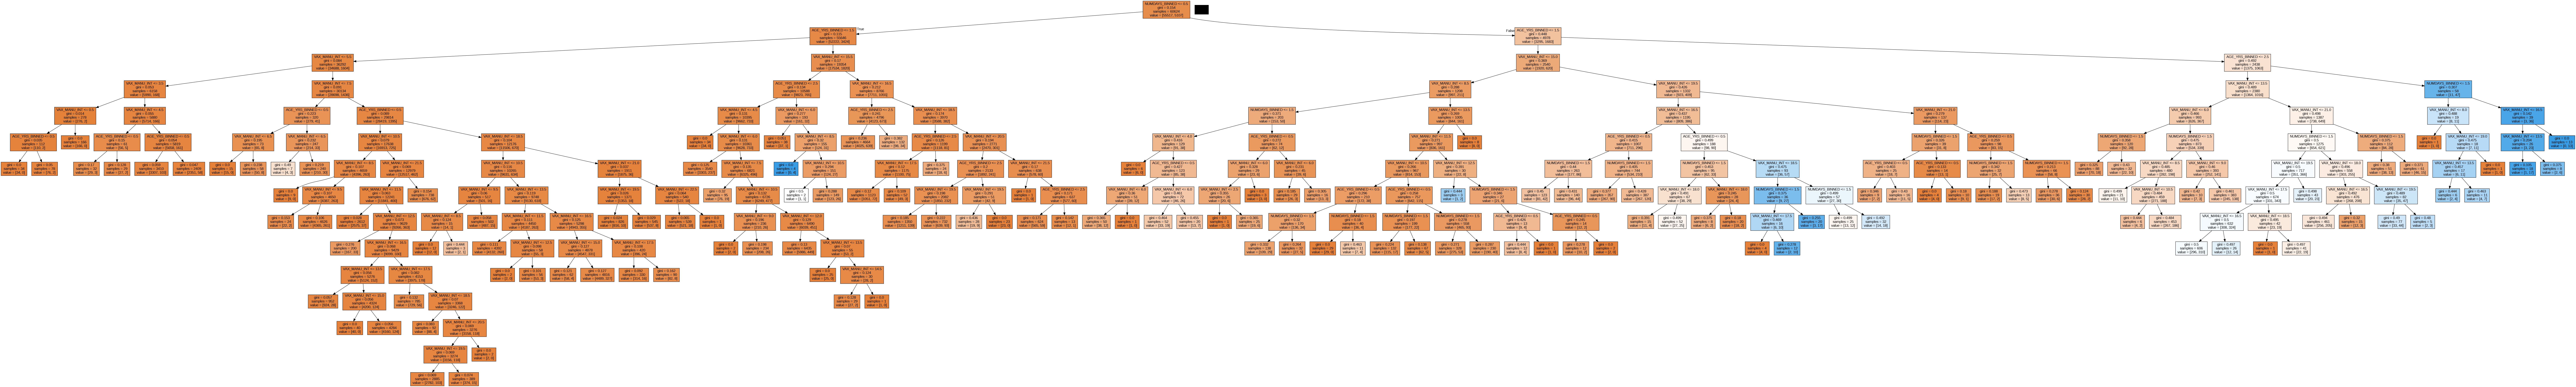

In [201]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Assuming DataFrame is your DataFrame
Features = DataFrame.drop('HOSPITAL', axis=1)  # Features (all columns except 'HOSPITAL')
Label = DataFrame['HOSPITAL']   # Target ('HOSPITAL' column)

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    return Image(graph.create_png())

# Assuming 'DecisionTree_Model' is your trained decision tree model
Image_instance = tree_graph_to_png(DecisionTree_Model, Features.columns, 'decision_tree.png')
display(Image_instance)  # Display the image

# Now let's filter the DataFrame based on the 'HOSPITAL' column
# Assuming 'HOSPITAL' is a binary column with values 0 and 1
filtered_data = DataFrame[DataFrame['HOSPITAL'] == 1]